<a href="https://colab.research.google.com/github/thefoxsaysding/MIPT-Homeworks/blob/main/HW_pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
from PIL import Image

%cd /content/drive/My Drive/
%matplotlib inline
plt.style.use('fivethirtyeight') #сделаем красивенько
plt.rcParams['figure.figsize'] = (15, 5)
drive.mount('/content/drive')


/content/drive/My Drive
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Предобработка данных и их подготовка к анализу и подаче в модель

Чтение данных из csv-файла на Google Drive, приведение типов

In [ ]:
lect_df = pd.read_csv("lectures.csv",
                      dtype={'lecture_id': 'int16',
                                 'tag': 'int16',
                                 'part': 'int8',
                                 'type_of': 'category'
                                }
                         )
train_df = pd.read_csv("train.csv",
                        dtype={'row_id': 'int32',
                              'timestamp': 'int32',
                              'user_id': 'int32',
                              'content_id': 'int16',
                              'content_type_id': 'int8',
                              'task_container_id': 'int16',
                              'user_answer': 'int8',
                              'answered_correctly':'int8',
                              'prior_question_elapsed_time': 'float32',
                              'prior_question_had_explanation': 'boolean'
                              },
                       nrows=10000000,
                       index_col=0
                      )
quest_df = pd.read_csv("questions.csv",
                          dtype={'question_id': 'int16',
                                 'bundle_id': 'int16',
                                 'correct_answer': 'int8',
                                 'part': 'int8',
                                }
                          )


In [ ]:
lect_df.info()
print()
display(lect_df.head(2))
print("\n\n\n")
train_df.info()
print()
display(train_df.head(2))
print("\n\n\n")
quest_df.info()
print()
display(quest_df.head(2))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   lecture_id  418 non-null    int16   
 1   tag         418 non-null    int16   
 2   part        418 non-null    int8    
 3   type_of     418 non-null    category
dtypes: category(1), int16(2), int8(1)
memory usage: 2.8 KB



,lecture_id,tag,part,type_of
0,89,159,5,concept
1,100,70,1,concept






<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000000 entries, 0 to 9999999
Data columns (total 9 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   timestamp                       int32  
 1   user_id                         int32  
 2   content_id                      int16  
 3   content_type_id                 int8   
 4   task_container_id               int16  
 5   user_answer                     int8   
 6   answered_correctly              int8   
 7   prior_question_elapsed_time     float32
 8   prior_question_had_explanation  boolean
dtypes: boolean(1), float32(1), int16(2), int32(2), int8(3)
memory usage: 276.6 MB



,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
row_id,,,,,,,,,
0,0,115,5692,0,1,3,1,NaN,<NA>
1,56943,115,5716,0,2,2,1,37000.0,False






<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13523 entries, 0 to 13522
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   question_id     13523 non-null  int16 
 1   bundle_id       13523 non-null  int16 
 2   correct_answer  13523 non-null  int8  
 3   part            13523 non-null  int8  
 4   tags            13522 non-null  object
dtypes: int16(2), int8(2), object(1)
memory usage: 185.0+ KB



,question_id,bundle_id,correct_answer,part,tags
0,0,0,0,1,51 131 162 38
1,1,1,1,1,131 36 81


Объединим данные для удобства

In [ ]:
train_lect_df = train_df.merge(lect_df, how='left', left_on='content_id', right_on='lecture_id')
train_lect_df.drop('lecture_id', axis=1, inplace=True)

result_df = train_lect_df.merge(quest_df, how='left', left_on='content_id', right_on='question_id')
result_df.drop('question_id', axis=1, inplace=True)

И посмотрим, что получилось

In [ ]:
result_df.info()
print()
display(result_df.head(2))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000000 entries, 0 to 9999999
Data columns (total 16 columns):
 #   Column                          Dtype   
---  ------                          -----   
 0   timestamp                       int32   
 1   user_id                         int32   
 2   content_id                      int16   
 3   content_type_id                 int8    
 4   task_container_id               int16   
 5   user_answer                     int8    
 6   answered_correctly              int8    
 7   prior_question_elapsed_time     float32 
 8   prior_question_had_explanation  boolean 
 9   tag                             float64 
 10  part_x                          float64 
 11  type_of                         category
 12  bundle_id                       float64 
 13  correct_answer                  float64 
 14  part_y                          float64 
 15  tags                            object  
dtypes: boolean(1), category(1), float32(1), float64(5), i

,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation,tag,part_x,type_of,bundle_id,correct_answer,part_y,tags
0,0,115,5692,0,1,3,1,NaN,<NA>,NaN,NaN,NaN,5692.0,3.0,5.0,151
1,56943,115,5716,0,2,2,1,37000.0,False,NaN,NaN,NaN,5716.0,2.0,5.0,168


# Анализ признаков

##Узнаем побольше про наш набор данных

Количество пользователей в итоговом датасете

In [ ]:
print(f'В датасете {result_df.user_id.nunique()} уникальных пользователей')

В датасете 39491 уникальных пользователей


Количество признаков в итоговом датасете

In [ ]:
result_df.shape[1]
print(f'В датасете {result_df.shape[1]} признаков')

В датасете 16 признаков


Проверим количество пустых значений для каждого столбца

In [ ]:
print(f'В датасете содержится следующее количество пустых значений для каждого столбца:\n')
result_df.isnull().sum()

В датасете содержится следующее количество пустых значений для каждого столбца:



timestamp                               0
user_id                                 0
content_id                              0
content_type_id                         0
task_container_id                       0
user_answer                             0
answered_correctly                      0
prior_question_elapsed_time        234784
prior_question_had_explanation      39388
tag                               9675185
part_x                            9675185
type_of                           9675185
bundle_id                          118946
correct_answer                     118946
part_y                             118946
tags                               118946
dtype: int64

Изучим типы контента в итоговой таблице

In [ ]:
print(f'Количество заданных вопросов в датасете составляет {result_df[result_df.content_type_id == False].content_id.nunique()}.')
print(f'Количество посещений лекций в датасете составляет {result_df[result_df.content_type_id == True].content_id.nunique()}.')
print(f'Количество уникального контента составляет {result_df.task_container_id.nunique()} пакетов.')

Количество заданных вопросов в датасете составляет 13500.
Количество посещений лекций в датасете составляет 402.
Количество уникального контента составляет 10000 пакетов.


Посмотрим на ответы пользователей на вопросы

In [ ]:
print(f'Количество правильных ответов составляет {result_df[result_df.answered_correctly != -1].answered_correctly.value_counts(ascending=True)[1]}, неправильных - {result_df[result_df.answered_correctly != -1].answered_correctly.value_counts(ascending=True)[0]}.')

Количество правильных ответов составляет 6457425, неправильных - 3347179.


## Приступим к анализу

Немного подготовки, создадим служебные данные и функционал

In [ ]:
quest_answer_df = result_df[result_df.content_type_id == 0] #полная таблица с вопросами и ответами
quest_answer_df = quest_answer_df[quest_answer_df.answered_correctly != -1]
stats_df = quest_answer_df[['content_id', 'answered_correctly']].groupby(['content_id']).agg(['mean'])
stats_df.columns = ['answered_correctly_mean']
stats_df['quest_part'] = quest_df.part

def is_it_right (field): #возьмем с kaggle служебную функцию 
    is_it_right = result_df[result_df.answered_correctly != -1].groupby([field, 'answered_correctly'], as_index=False).size()
    is_it_right = is_it_right.pivot(index= field, columns='answered_correctly', values='size')
    is_it_right['Percent'] = round(is_it_right.iloc[:,1]/(is_it_right.iloc[:,0] + is_it_right.iloc[:,1]),2)*100
    is_it_right = is_it_right.sort_values(by = "Percent", ascending = False)
    is_it_right = is_it_right.iloc[:,2]
    return(is_it_right)

stat_quest_user_df = result_df[['user_id', 'answered_correctly']].groupby(['user_id']).agg(['mean', 'sum', 'count']) #статистика по каждому пользователю
stat_quest_user_df.columns = ['answered_correctly_mean', 'sum_correct', 'count']

expl_quest_df = result_df[['user_id', 'prior_question_had_explanation']].groupby(['user_id']).agg(['sum']).sort_values(by=['user_id']) #обратившиеся за объсянением пользователи
expl_quest_df.columns = ['explanation_sum']

lect_user_data = result_df.groupby(["user_id", "answered_correctly"]).size().unstack() #статистика по лекциям
lect_user_data.columns = ['Lecture', 'Wrong', 'Right']
lect_user_data['Lecture'] = lect_user_data['Lecture'].fillna(0)
lect_user_data = lect_user_data.astype('Int64')
lect_user_data['Watches_lecture'] = np.where(lect_user_data.Lecture > 0, True, False)

Узнаем, есть ли слишком сложные и слишком простые ответы

In [ ]:
print(f'Самыми сложными оказались {len(stats_df[stats_df.answered_correctly_mean == 0].index)} вопроса - на них не ответил никто. Это вопросы с номерами:')
print(list(stats_df[stats_df.answered_correctly_mean == 0].index))

Самыми сложными оказались 2 вопроса - на них не ответил никто. Это вопросы с номерами:
[7848, 7849]


In [ ]:
print(f'Самыми простыми оказались {len(stats_df[stats_df.answered_correctly_mean == 1].index)} вопросов - на них ответили все. Это вопросы с номерами:')
print(list(stats_df[stats_df.answered_correctly_mean == 1].index))

Самыми простыми оказались 280 вопросов - на них ответили все. Это вопросы с номерами:
[238, 243, 440, 563, 616, 674, 760, 850, 1323, 1385, 1634, 1893, 1906, 1907, 2229, 2476, 2709, 2774, 2775, 2812, 2842, 2844, 2902, 2927, 3032, 3039, 3043, 3102, 3103, 3104, 3198, 3200, 3449, 3534, 3555, 3578, 4275, 4389, 4618, 4632, 4652, 4656, 4662, 4663, 4741, 4869, 5041, 5079, 5377, 5475, 5537, 5538, 5770, 5774, 5816, 5826, 5872, 6223, 6236, 7137, 7138, 7139, 7195, 7199, 7361, 7364, 7372, 7373, 7375, 7566, 7567, 7568, 7850, 8050, 8052, 8053, 8094, 8095, 8097, 8098, 8099, 8101, 8103, 8104, 8105, 8108, 8109, 8110, 8112, 8114, 8117, 8129, 8130, 8131, 8132, 8480, 9265, 9268, 9304, 9726, 11560, 11563, 11631, 11695, 11724, 11902, 12283, 12284, 12285, 12303, 12315, 12330, 12331, 12340, 12348, 12351, 12371, 12389, 12393, 12435, 12439, 12471, 12504, 12515, 12519, 12540, 12543, 12546, 12548, 12565, 12570, 12587, 12590, 12601, 12612, 12615, 12616, 12617, 12620, 12623, 12625, 12628, 12637, 12641, 12642, 12644,

Посмотрим, справляются ли новые пользователи с вопросами также как "старички"

Судя по всему, корреляции нет, но интересным образом выбивается группа,  зарегистрированная относительно недавно


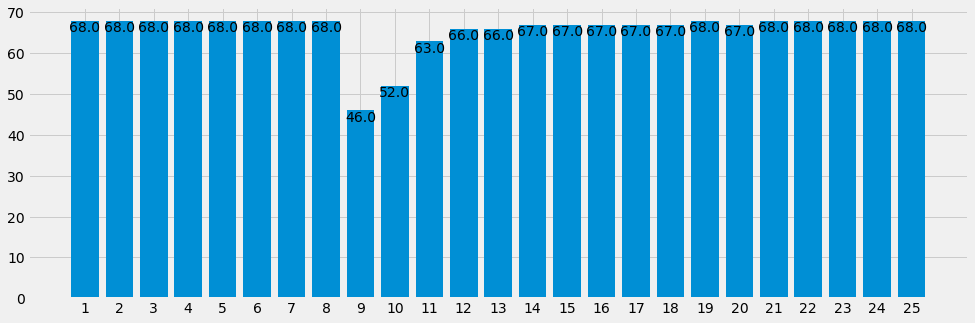

In [ ]:
timeslots = ['1', '2', '3', '4', '5','6' , '7', '8', '9', '10', '11', '12', '13', '14', '15','16','17','18','19','20','21','22','23','24','25']
result_df['ts_slots'] = pd.qcut(result_df['timestamp'], q=25, labels=timeslots)

slots_correct = is_it_right("ts_slots")
slots_correct = slots_correct.sort_index()

print("Судя по всему, корреляции нет, но интересным образом выбивается группа,  зарегистрированная относительно недавно")
fig = plt.figure()
plt.bar(slots_correct.index, slots_correct.values)
for i, v in zip(slots_correct.index, slots_correct.values):
    plt.text(i, v, v, color='black', fontsize=14, va='top', ha='center')
plt.xticks(rotation=0)
plt.show()


Теперь изучим отдельных пользователей - посмотрим распределение правильных ответов в зависимости от общего числа вопросов, на которые отвечал пользователь

На все вопросы верно ответили 26 пользователей. В среднем, с большим опытом пользователя (при большем количестве пройденных вопросов), количество правильных ответов возрастает:



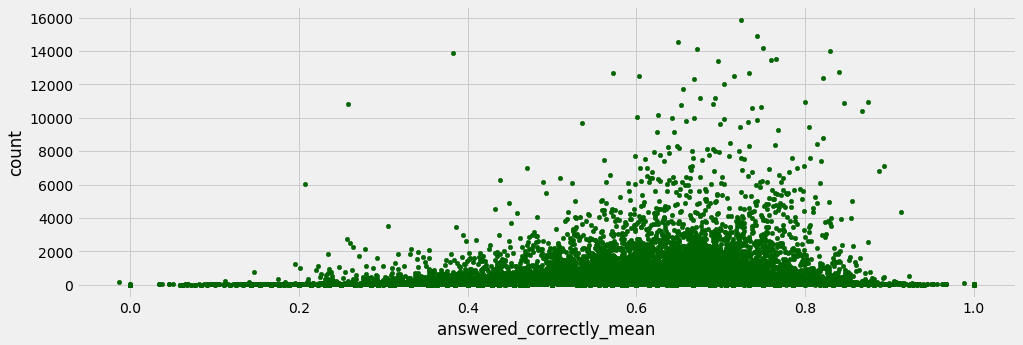

In [ ]:
top_users_df = stat_quest_user_df[stat_quest_user_df.answered_correctly_mean == 1]
print(f"На все вопросы верно ответили {len(list(top_users_df.index))} пользователей. В среднем, с большим опытом пользователя (при большем количестве пройденных вопросов), количество правильных ответов возрастает:\n")
stat_quest_user_df.plot.scatter(x='answered_correctly_mean', y='count', c='DarkGreen')

Узнаем, имеет ли значение, пытается ли разобраться в верном решении пользователь

Отличная демонстрация важности самообразования! Чем больше студент обращается за объяснением правильного ответа, тем больше правильных ответов он дает:



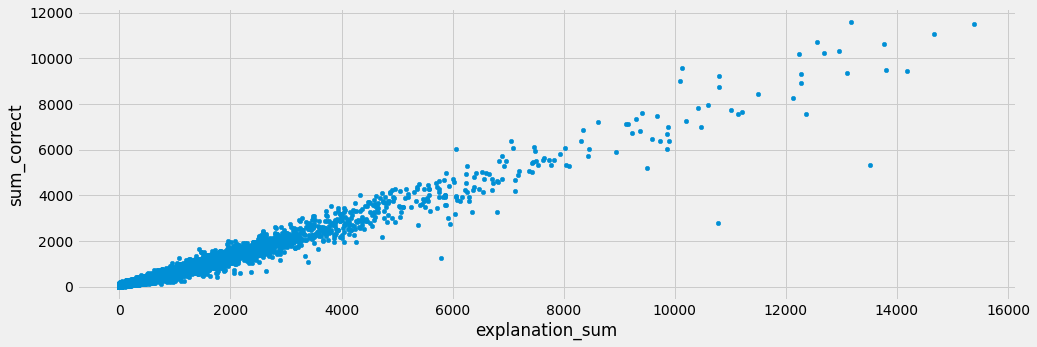

In [ ]:
stat_quest_user_df = stat_quest_user_df.merge(expl_quest_df, how='left', left_on='user_id', right_on='user_id')
print(f"Отличная демонстрация важности самообразования! Чем больше студент обращается за объяснением правильного ответа, тем больше правильных ответов он дает:\n")
stat_quest_user_df.plot(x='explanation_sum', y='sum_correct', kind = 'scatter');

А что же с лекциями?

Наблюдается повышение качества ответов у пользователей, посещавших лекции: 



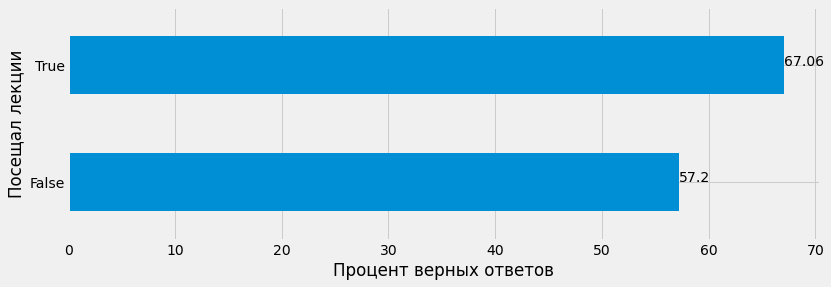

In [ ]:
took_part = lect_user_data.groupby("Watches_lecture").agg({'Wrong': ['sum'], 'Right': ['sum']})
took_part['Percent_correct'] = took_part.Right/(took_part.Right + took_part.Wrong)*100
took_part = took_part.iloc[:,2]
print(f'Наблюдается повышение качества ответов у пользователей, посещавших лекции: \n')
fig = plt.figure(figsize=(12,4))
took_part.plot.barh()
for i, v in zip(took_part.index, took_part.values):
    plt.text(v, i, round(v,2))

plt.xlabel("Процент верных ответов")
plt.ylabel("Посещал лекции")
plt.show()

# Подведем итог

В результате анализа данных можно сделать вывод, что для того, чтобы быть умным, нужно учиться :)

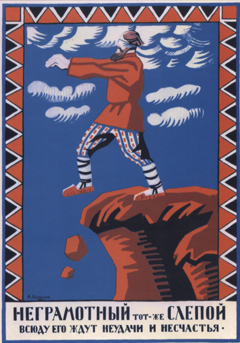